# Post-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get values
data = pd.read_csv('./eplusout.csv')
data.head()

In [4]:
# Get all output variables names
DAT_keys = sorted([col for col in data.columns if "discharge" in col.lower()])
pri_air_flow_keys = sorted([col for col in data.columns if "primary air mass" in col.lower()])
sec_air_flow_keys = sorted([col for col in data.columns if "secondary" in col.lower()])
operation_keys = sorted([col for col in data.columns if "operation" in col.lower()])
fan_air_flow_keys = sorted([col for col in data.columns if "fan air mass " in col.lower() and "1:" not in col.lower() and "space5-1" not in col.lower()])
predicated_keys = sorted([col for col in data.columns if "Predicted Sensible Load to Heating Setpoint Heat Transfer Rate" in col and "plenum" not in col.lower() and "space5-1" not in col.lower()])
titles = ["Series - Modulated", "Parallel - Modulated", "Series - Staged", "Parallel - Staged"]
terminal_schedule = sorted([col for col in data.columns if "reheatcoilavailsched" in col.lower()])


In [6]:
# Forward fill all missing values (when detailed timestep output is not available)
data = data.fillna(method='ffill')
data = data.loc[data[terminal_schedule[0]] > 0, :]

C:\Users\lero023\AppData\Local\Temp\ipykernel_34372\1810112151.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [7]:
# Replace integer operating control stages with strings
# See "ReportCurOperatingControlStage" functions in PoweredInductionUnits.cc
def replace_operation_keys(key):
    key = int(key)
    if key == 0:
        return "off"
    elif key == 1:
        return "CV cooling"
    elif key == 2:
        return "CV heating"
    elif key == 3:
        return "deadband"
    elif key == 4:
        return "VS 1st stage cooling"
    elif key == 5:
        return "VS 2st stage cooling"
    elif key == 6:
        return "VS staged 1st stage heating"
    elif key == 7:
        return "VS staged 2nd stage heating"
    elif key == 8:
        return "VS modulated 1st stage heating"
    elif key == 9:
        return "VS modulated 2nd stage heating"
    elif key == 10:
        return "VS modulated 3rd stage heating"
    else:
        return key

for i in range(len(operation_keys)):
    data[operation_keys[i]] = data.apply(lambda x: replace_operation_keys(x[operation_keys[i]]), axis = 1)

# Plots

### Fan Mass Air Flow Rate = f(Zone Sensible Predicted Load to Heating Setpoint)

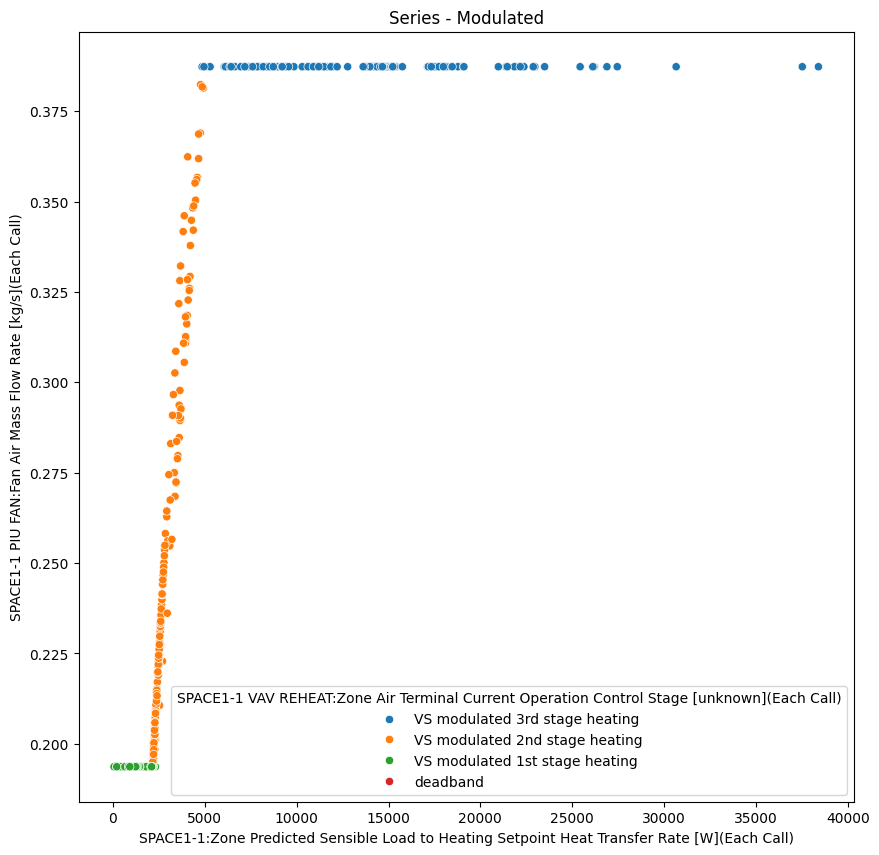

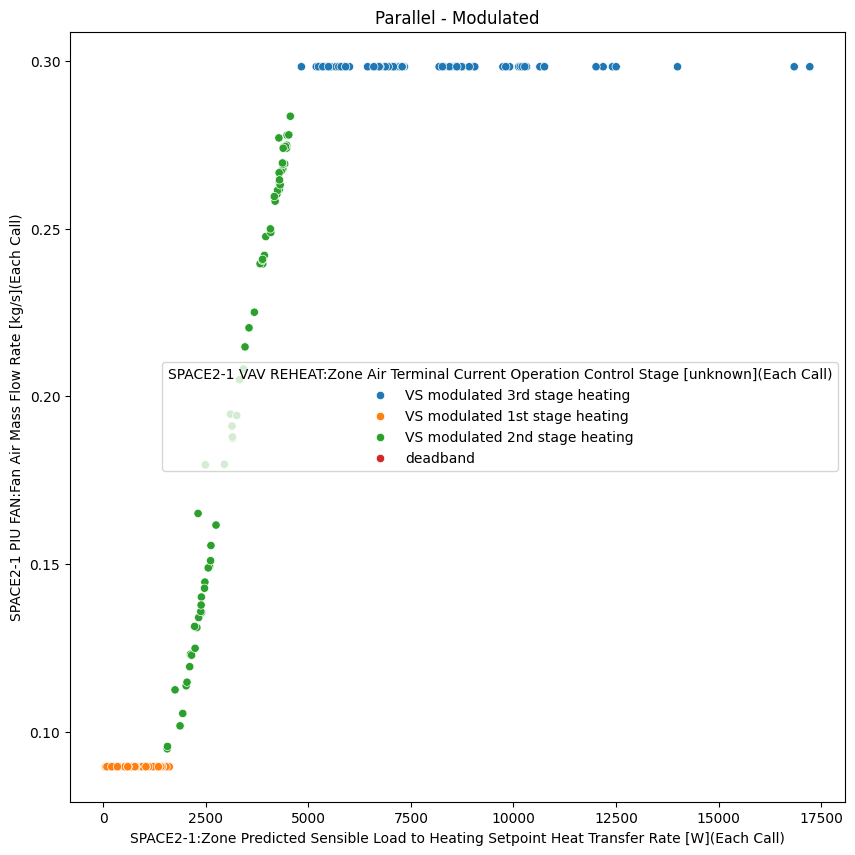

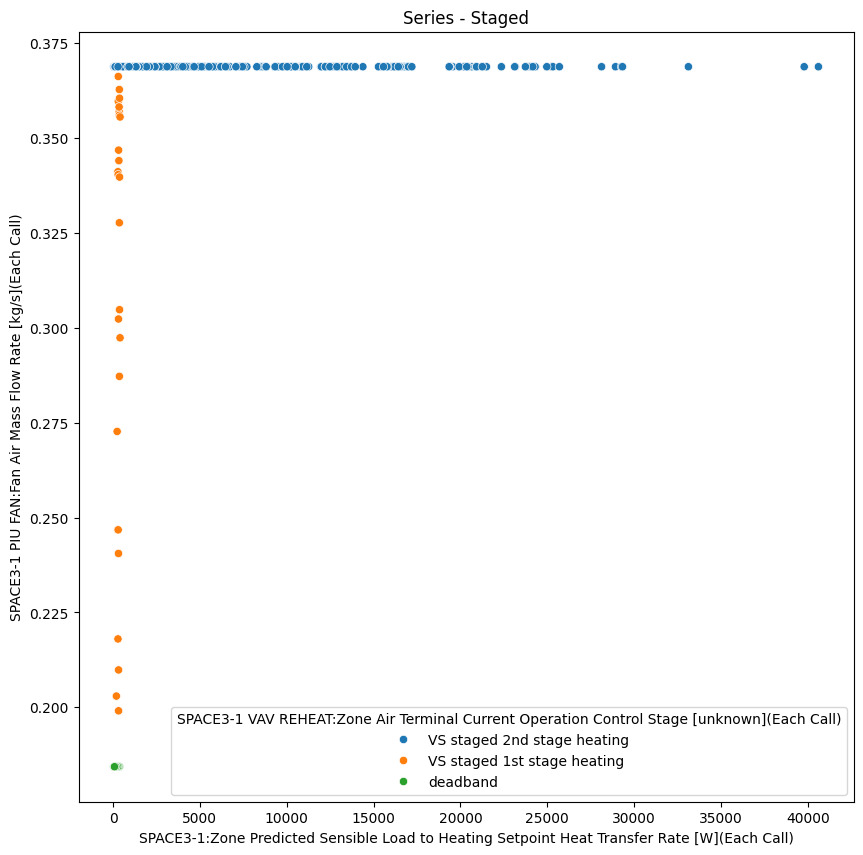

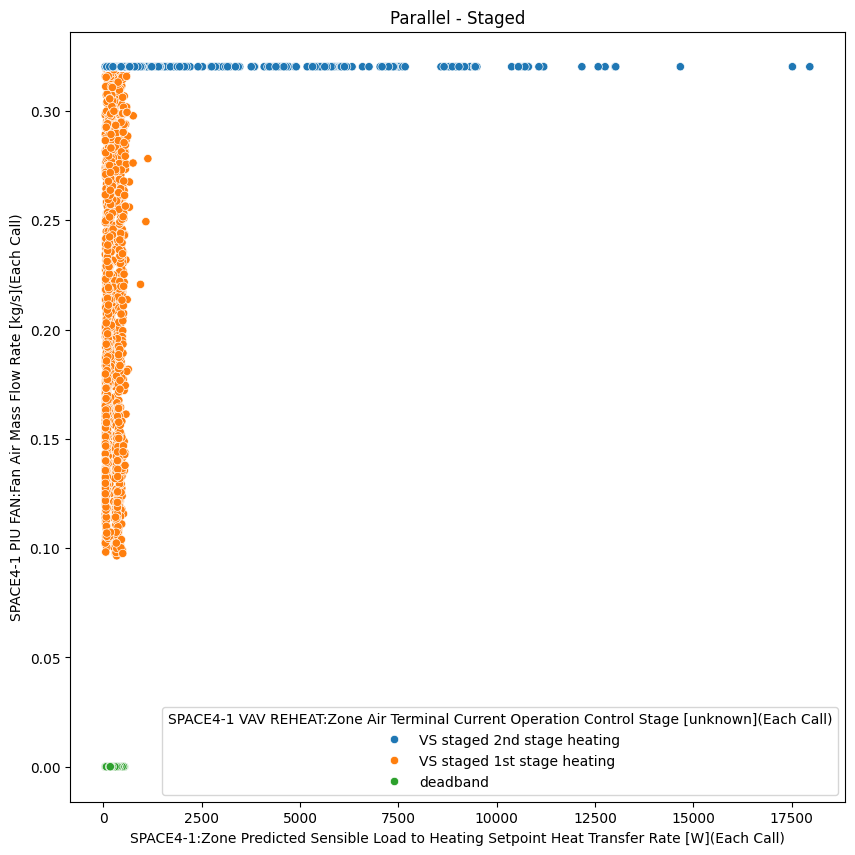

In [8]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    data_heating = data.loc[data[predicated_keys[i]] > 0, :]
    plt.title(f"{titles[i]}")
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=fan_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()

### Discharge Air Temperature = f(Zone Sensible Predicted Load to Heating Setpoint)

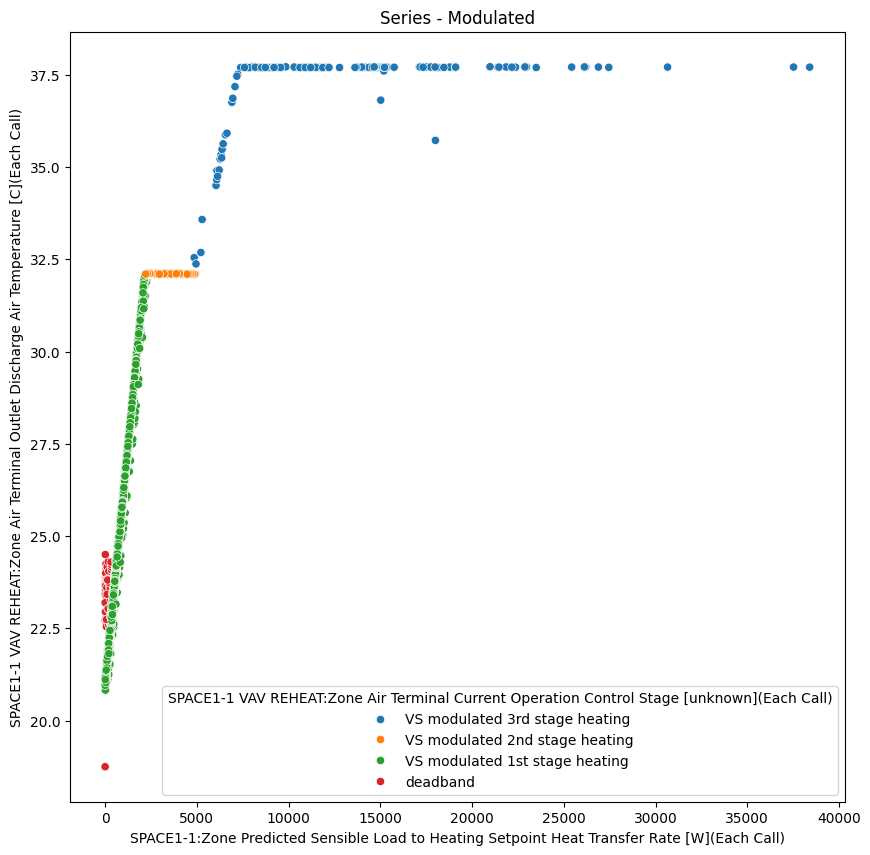

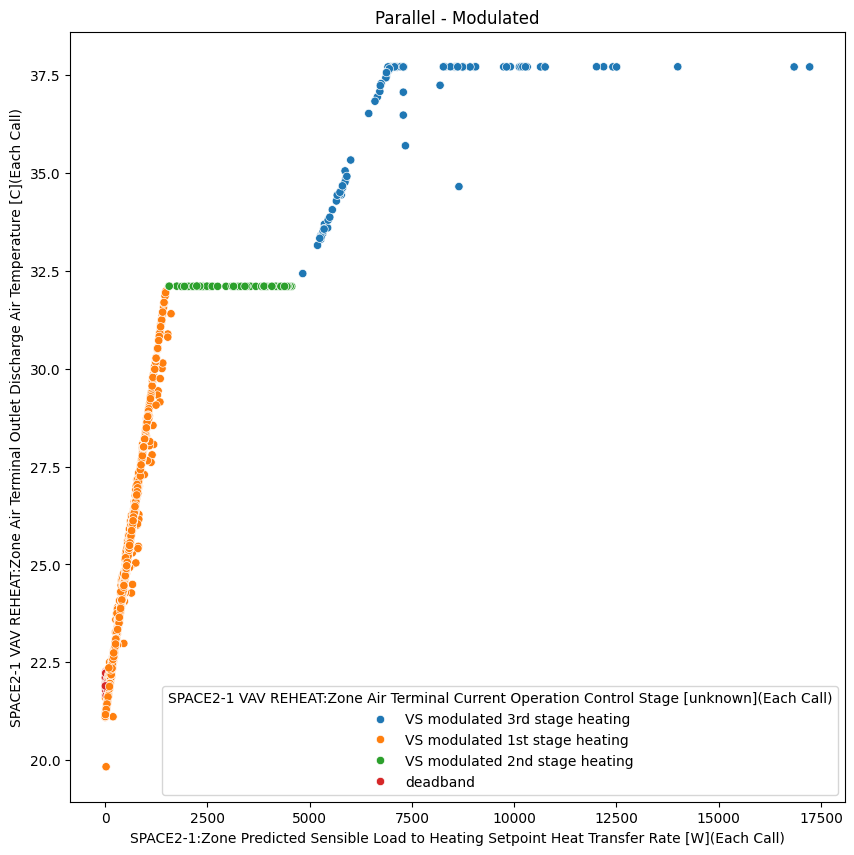

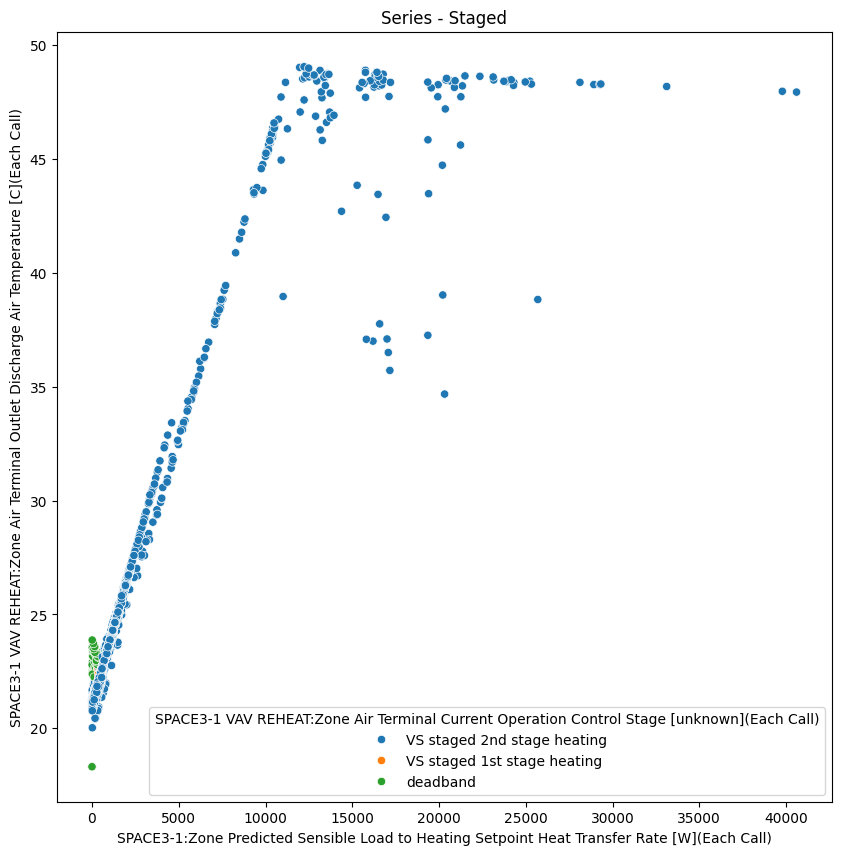

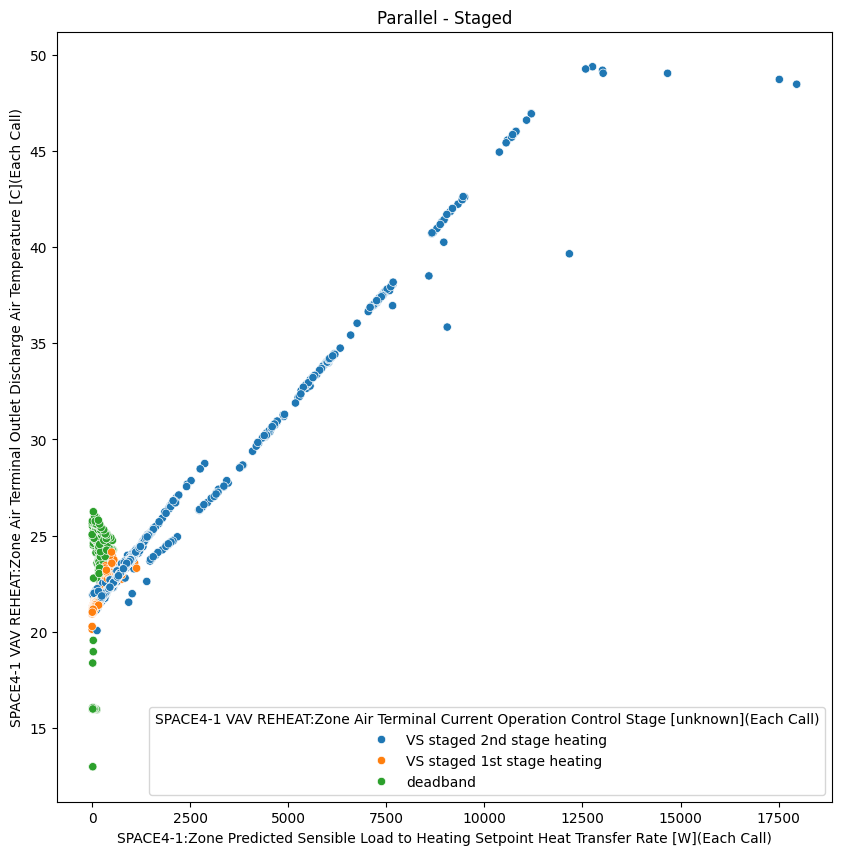

In [9]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_heating = data.loc[data[predicated_keys[i]] > 0, :]
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=DAT_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()

### Primary Mass Air Flow Rate = f(Zone Sensible Predicted Load to Heating Setpoint)

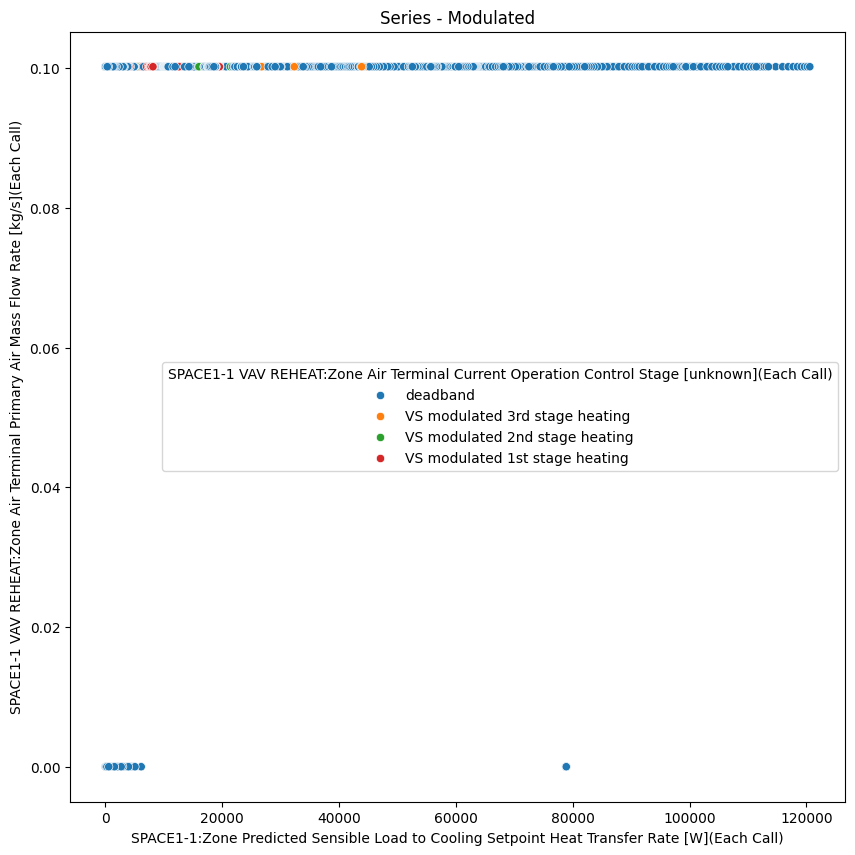

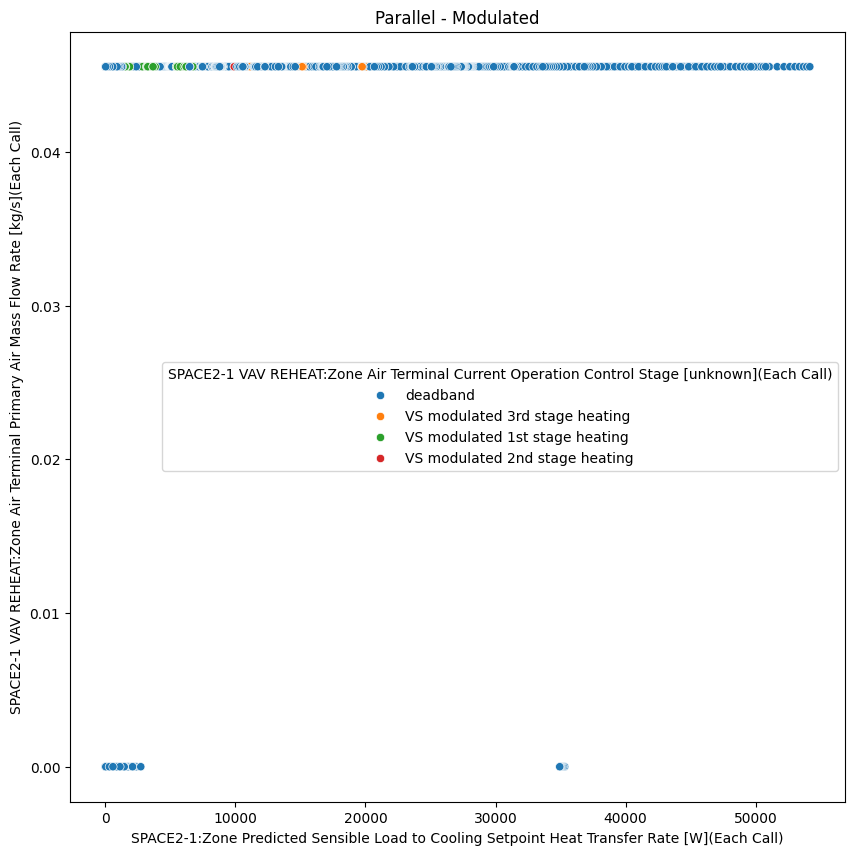

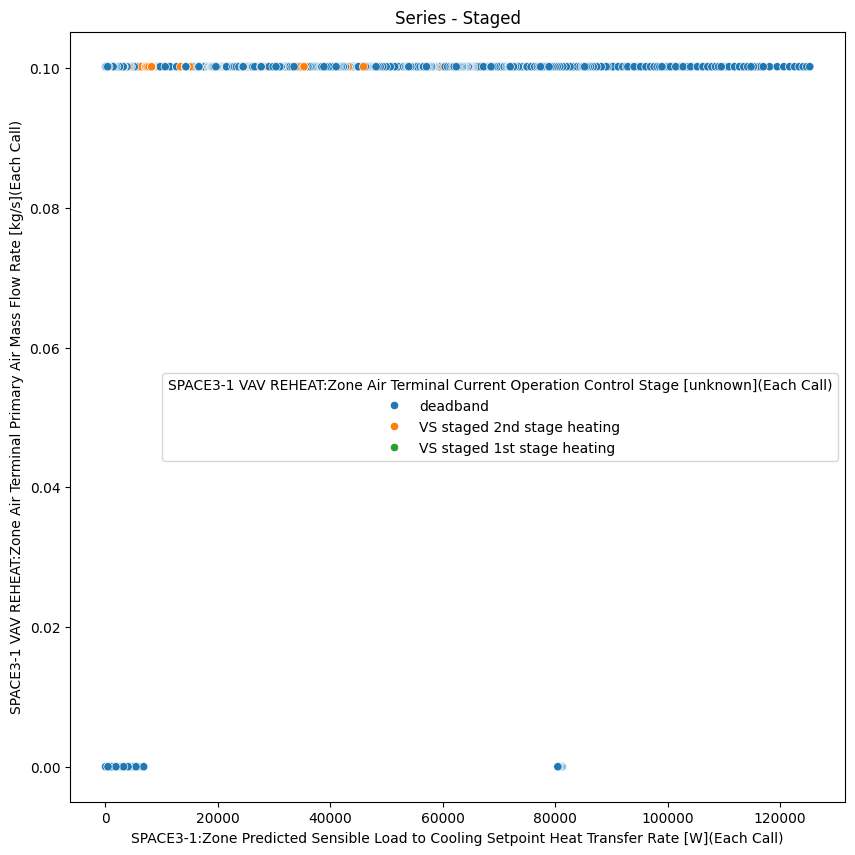

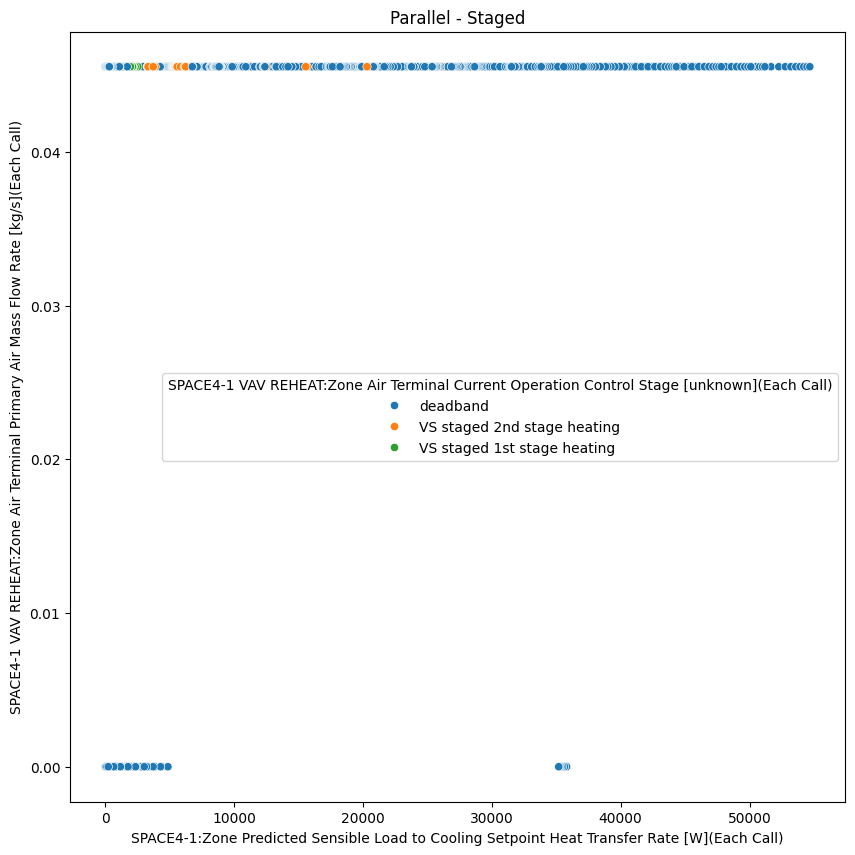

In [14]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_heating = data.loc[data[predicated_keys[i]] > 0, :]
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=pri_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()

### Secondary Mass Air Flow Rate = f(Zone Sensible Predicted Load to Heating Setpoint)

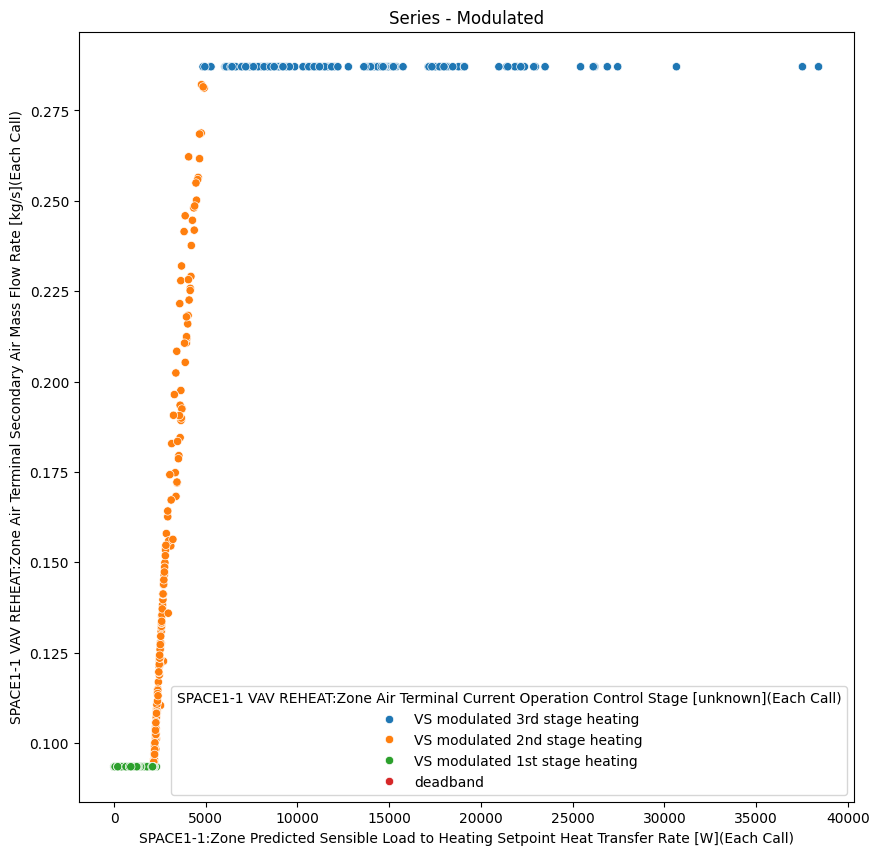

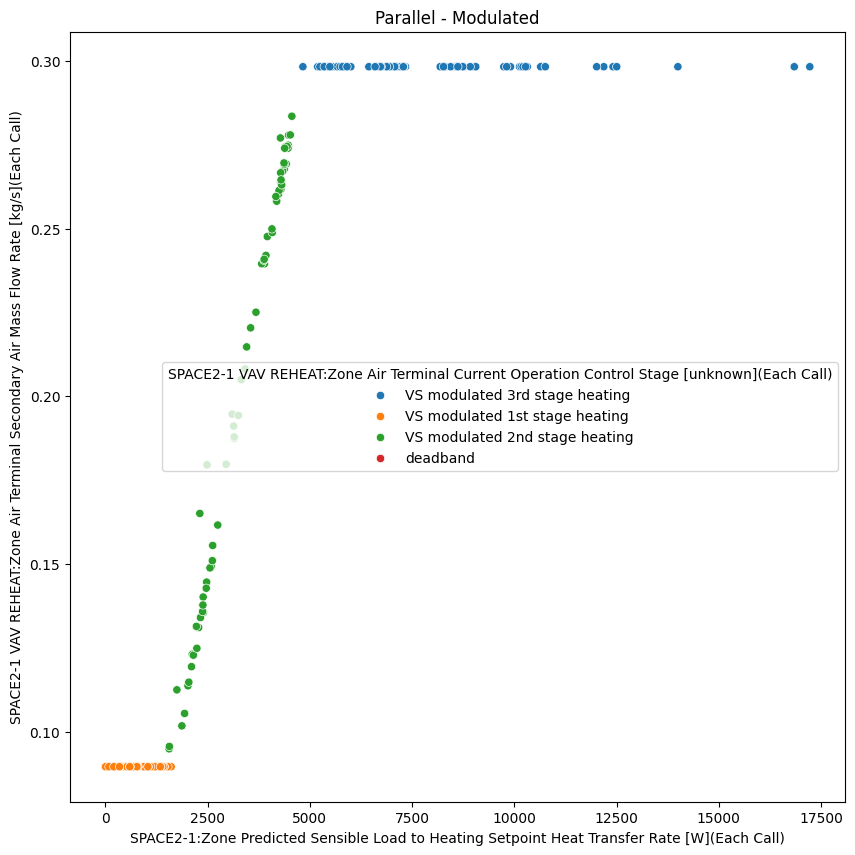

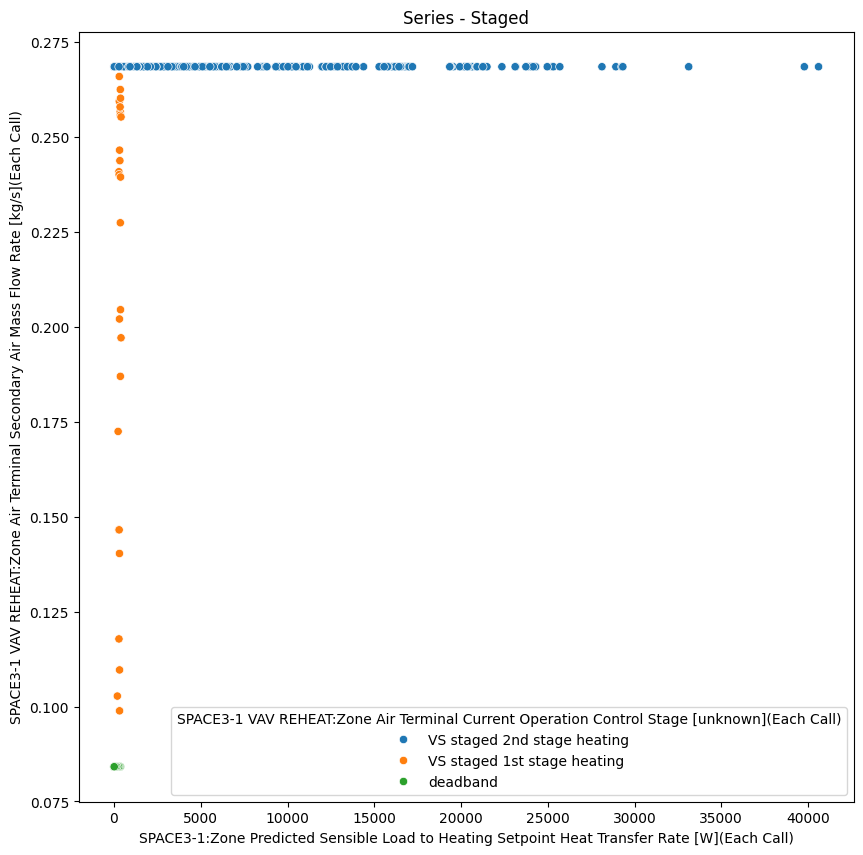

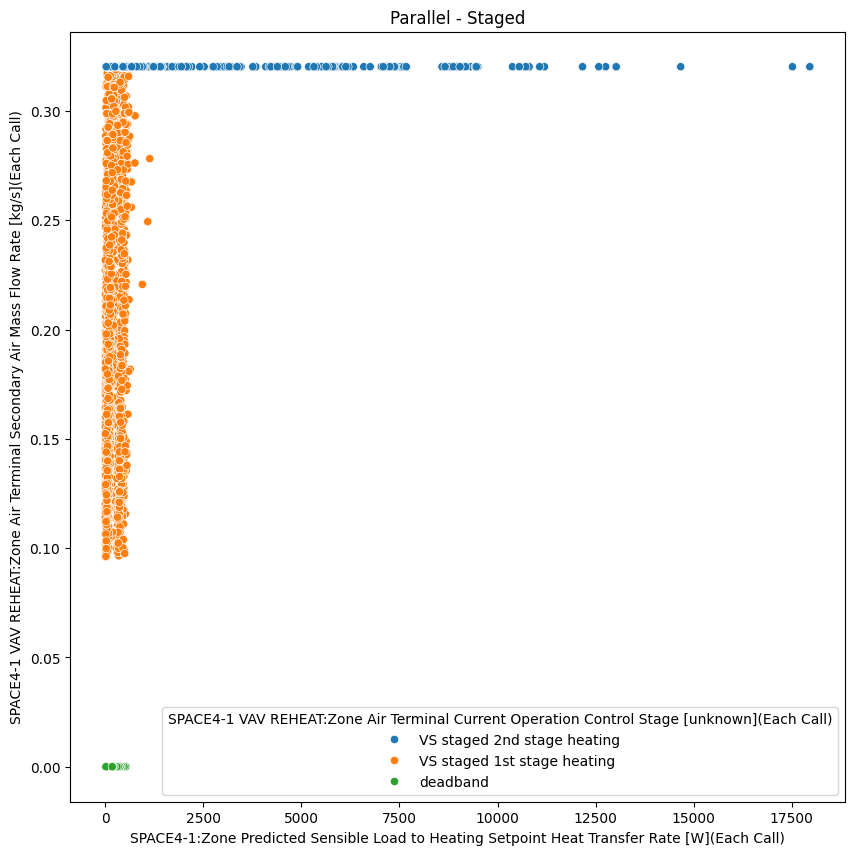

In [10]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_heating = data.loc[data[predicated_keys[i]] > 0, :]
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=sec_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()

### Fan Mass Air Flow Rate = f(Zone Sensible Predicted Load to Cooling Setpoint)

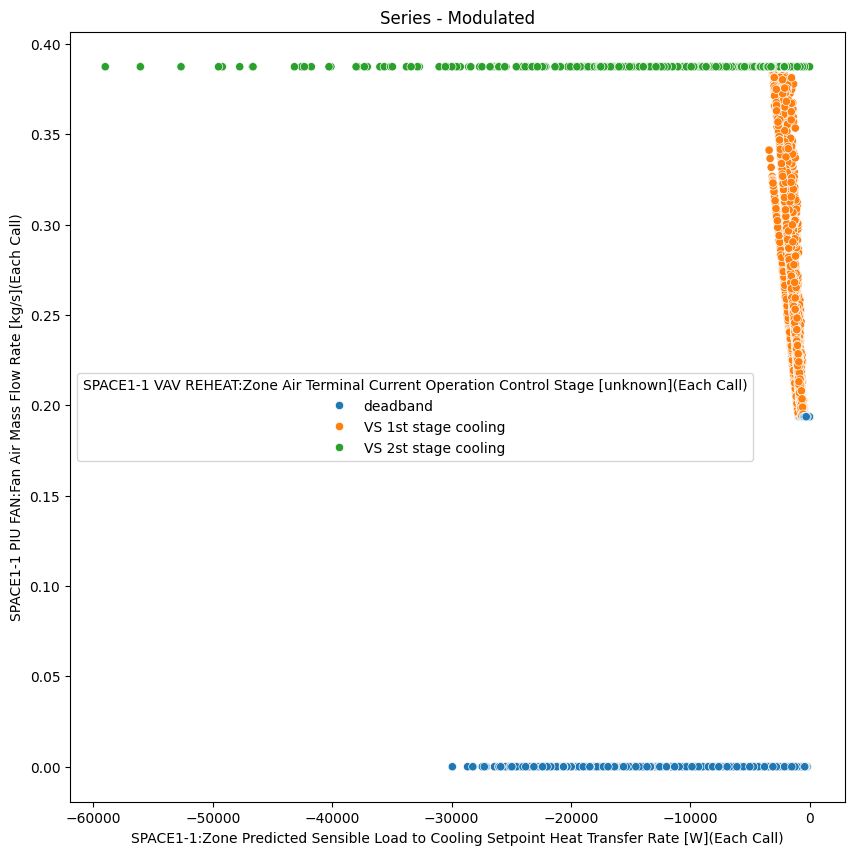

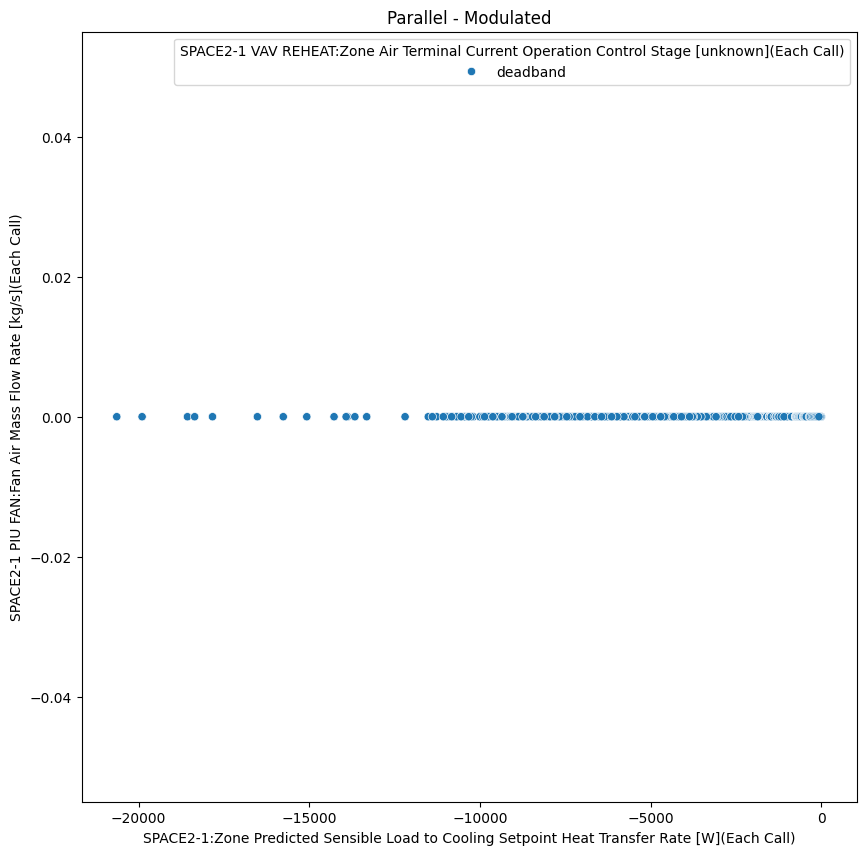

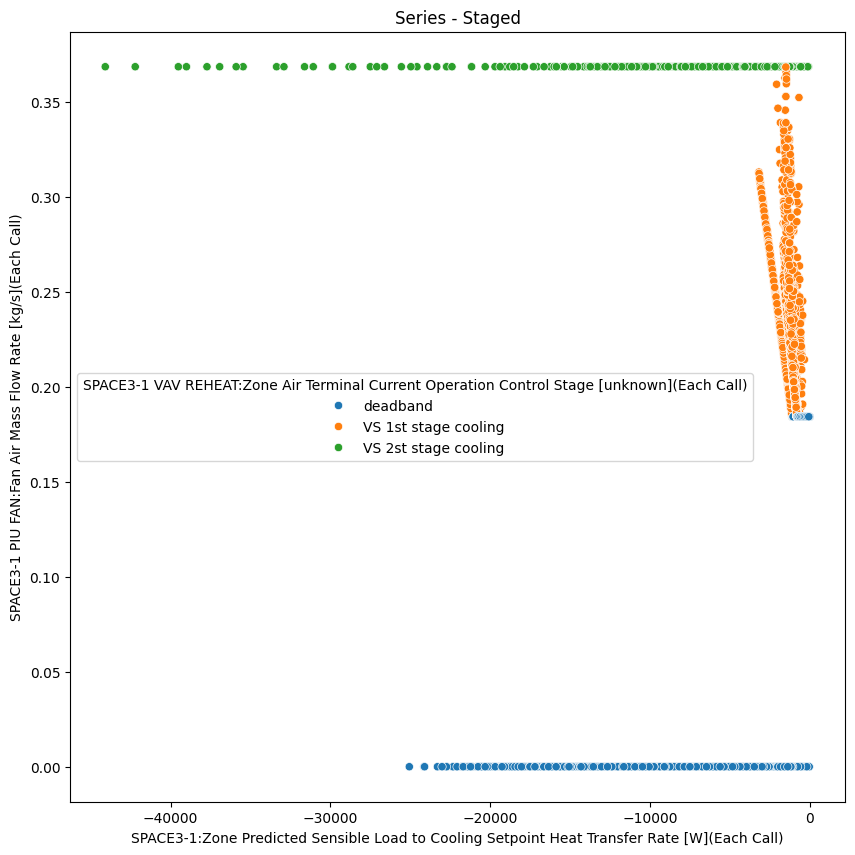

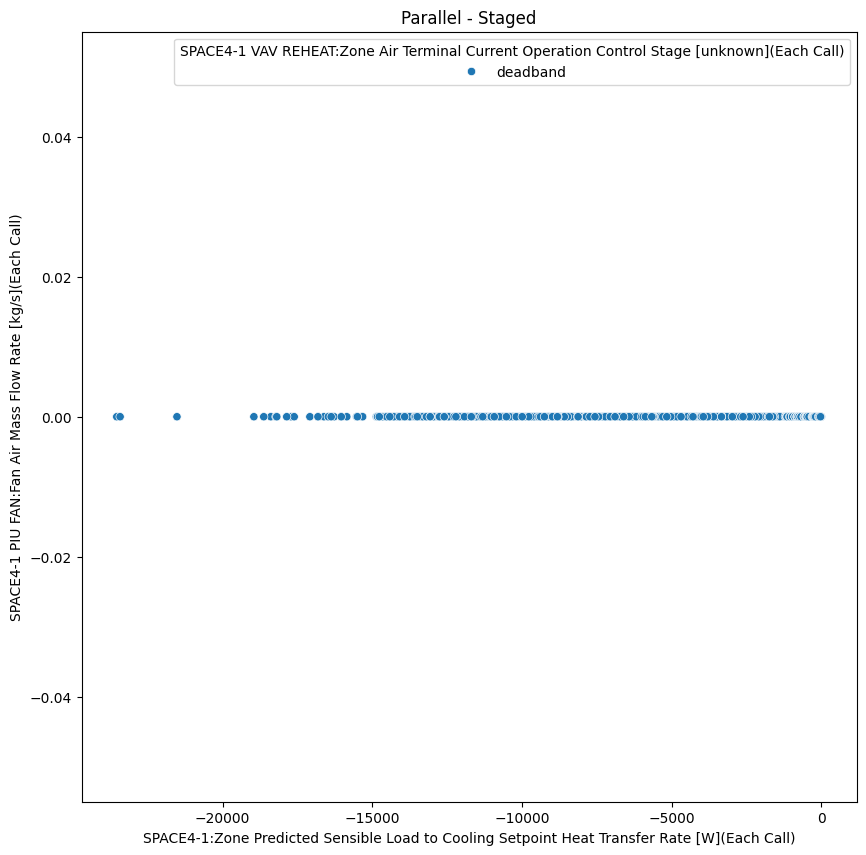

In [13]:
predicated_keys = sorted([col for col in data.columns if "Predicted Sensible Load to Cooling Setpoint Heat Transfer Rate" in col and "plenum" not in col.lower() and "space5-1" not in col.lower()])
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_cooling = data.loc[data[predicated_keys[i]] < 0, :]
    sns.scatterplot(data=data_cooling, x=predicated_keys[i], y=fan_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()

### Primary Mass Air Flow Rate = f(Zone Sensible Predicted Load to Cooling Setpoint)

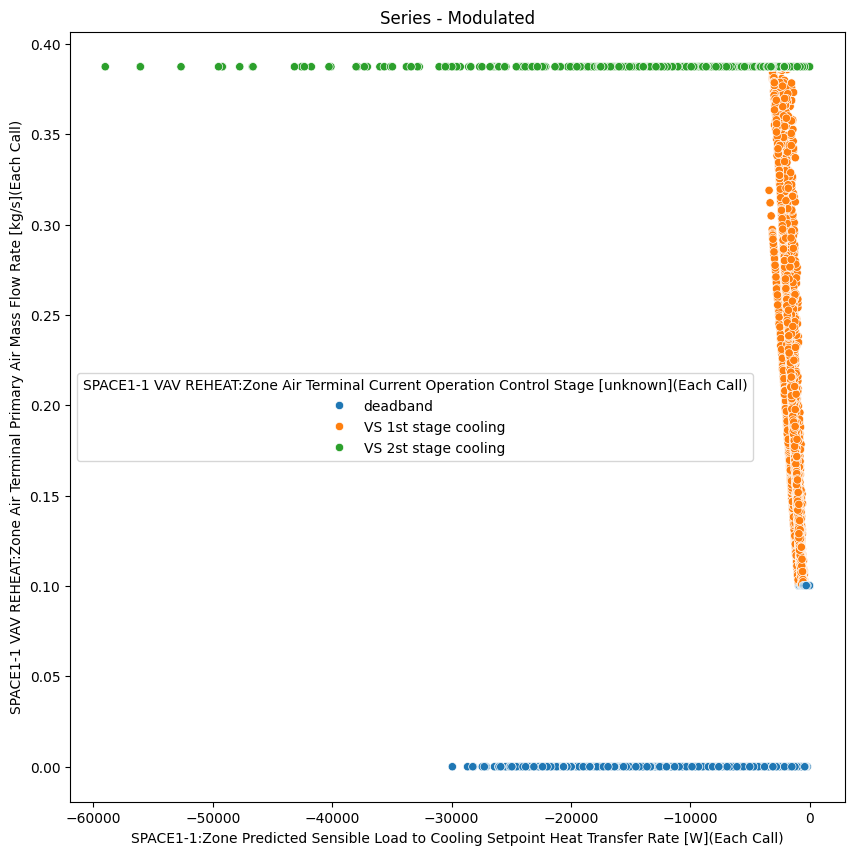

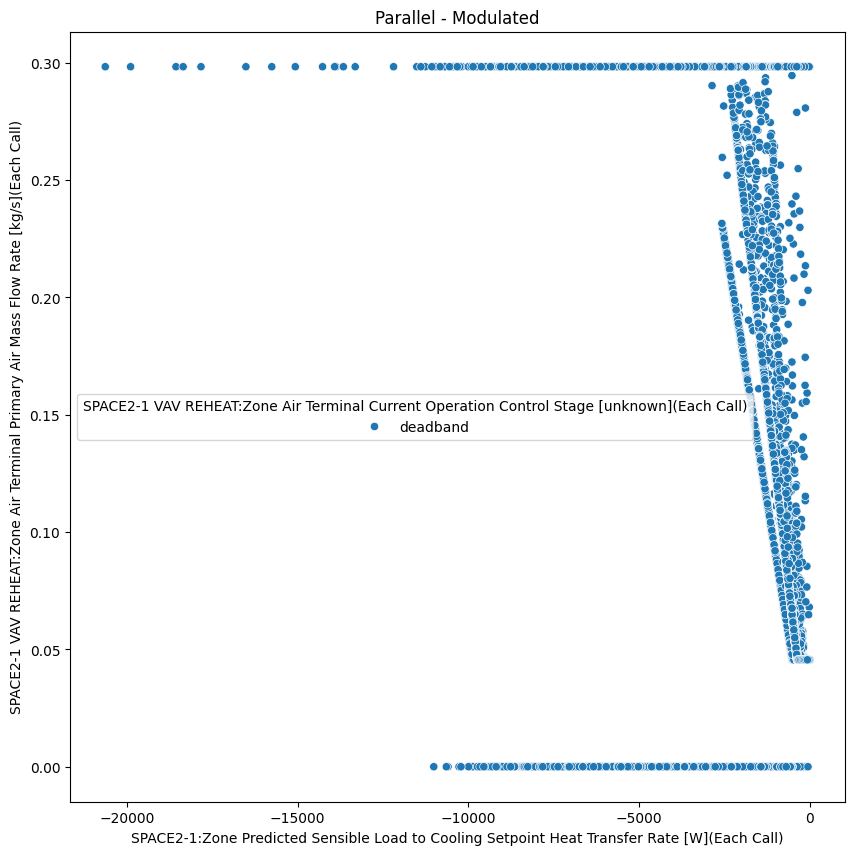

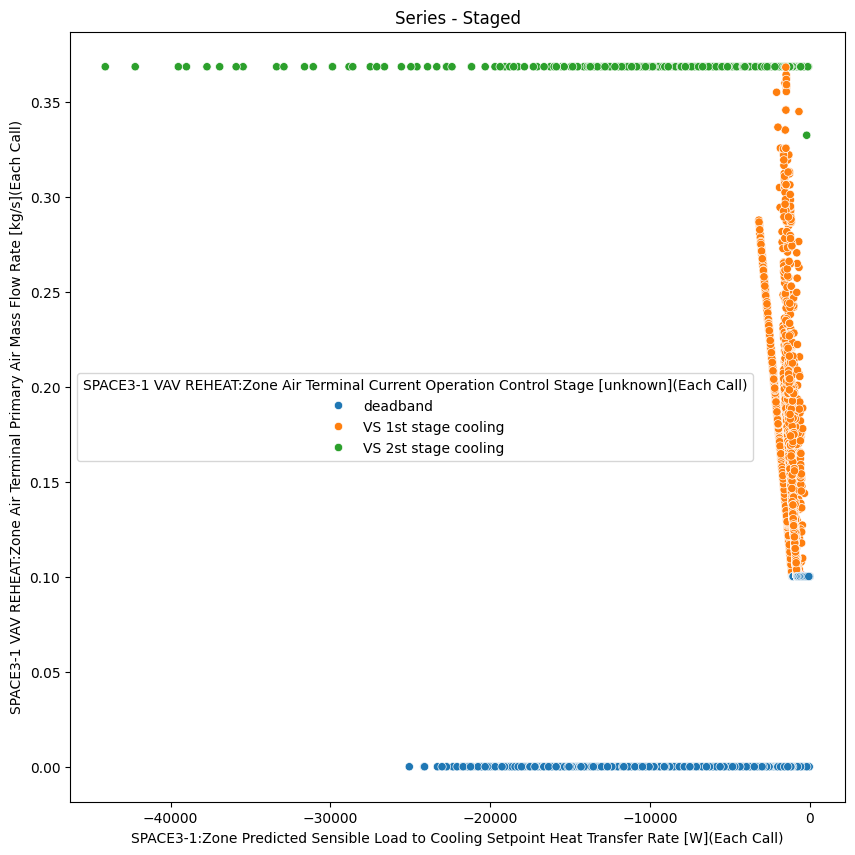

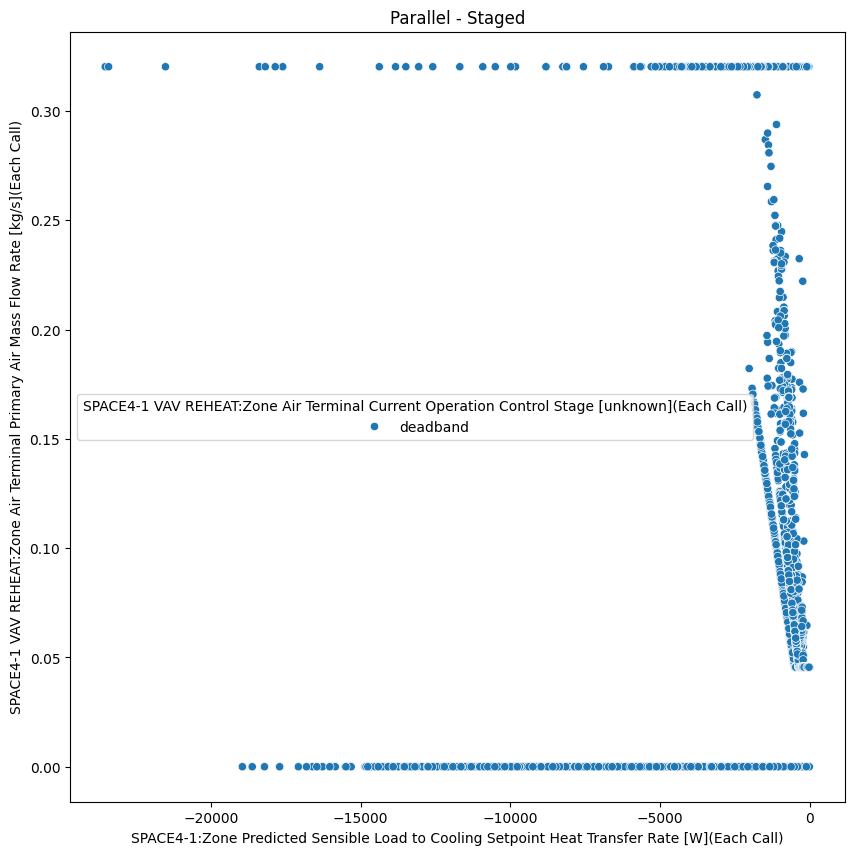

In [15]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_heating = data.loc[data[predicated_keys[i]] < 0, :]
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=pri_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()


### Secondary Mass Air Flow Rate = f(Zone Sensible Predicted Load to Cooling Setpoint)

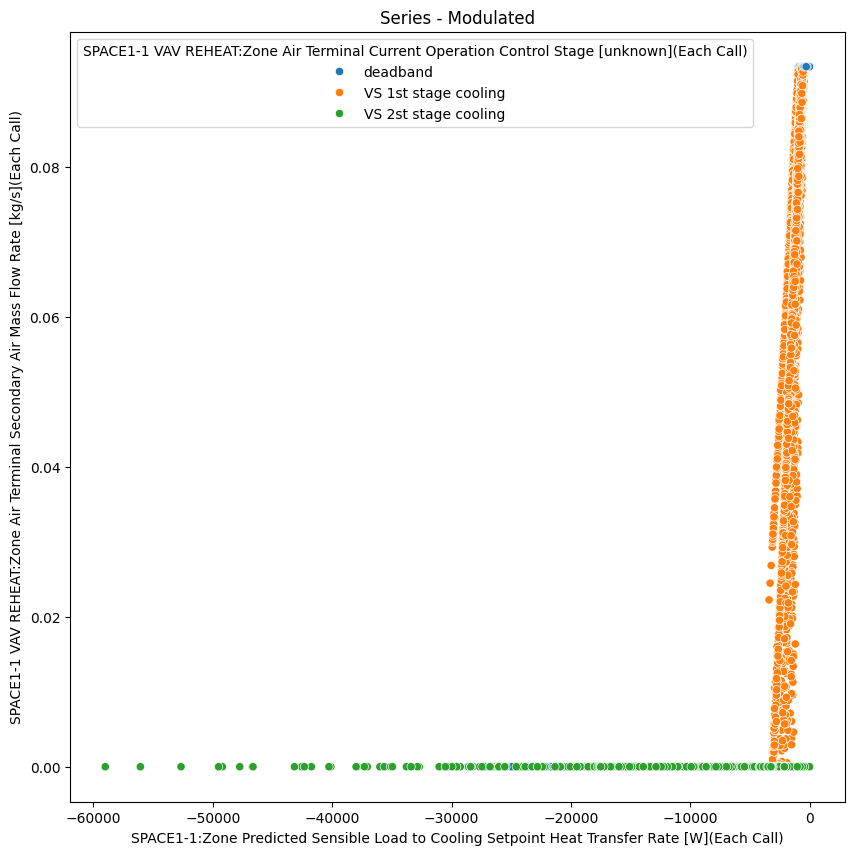

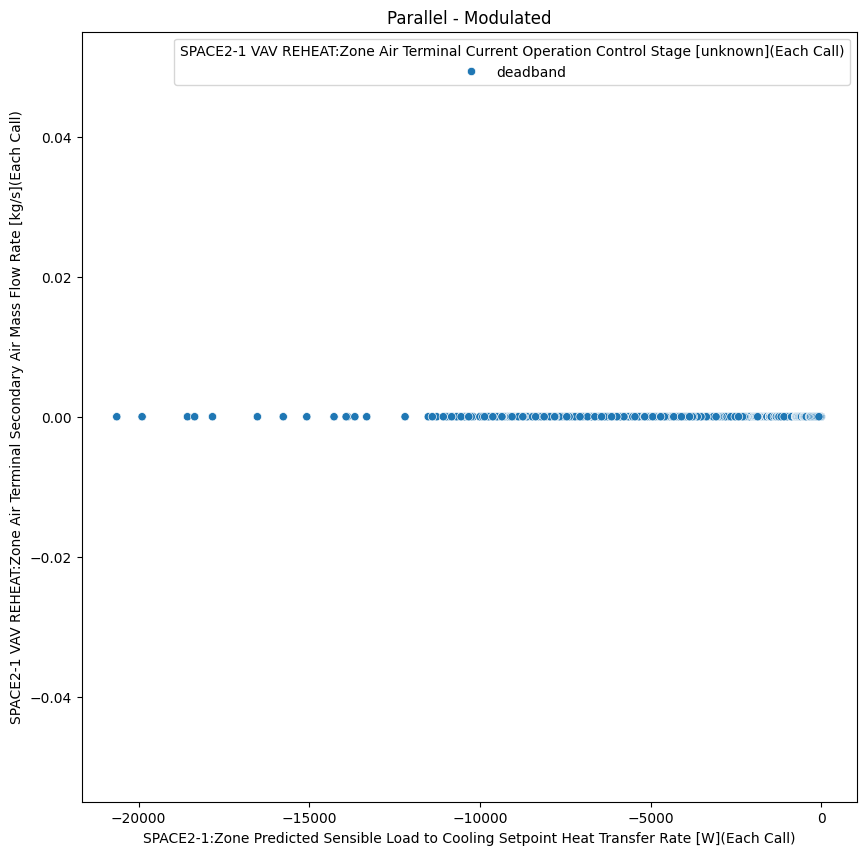

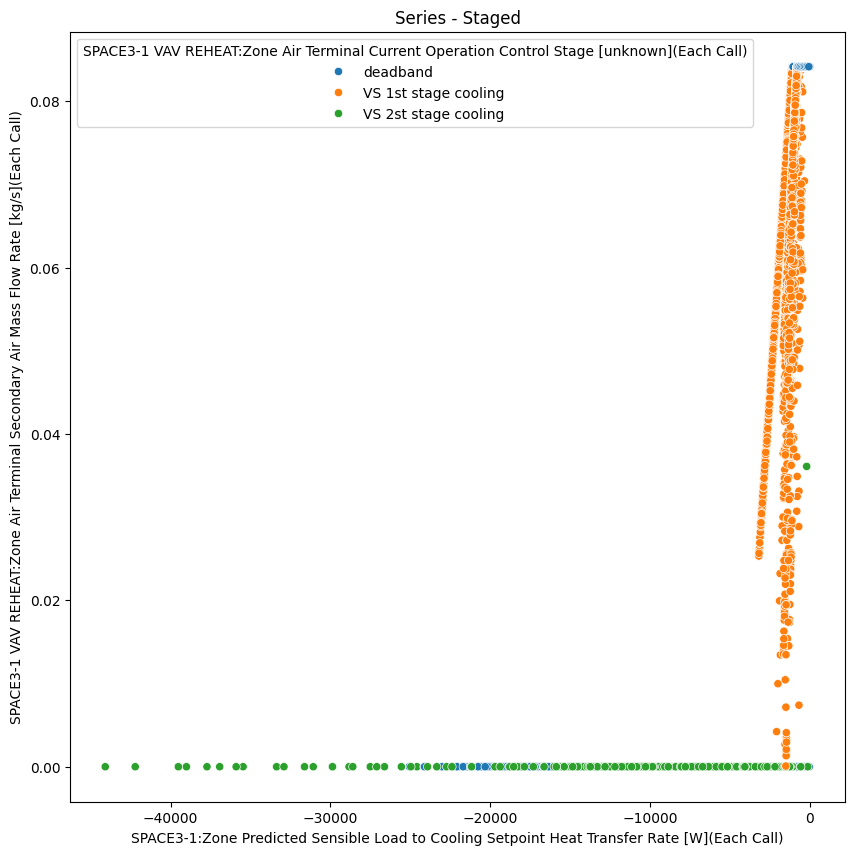

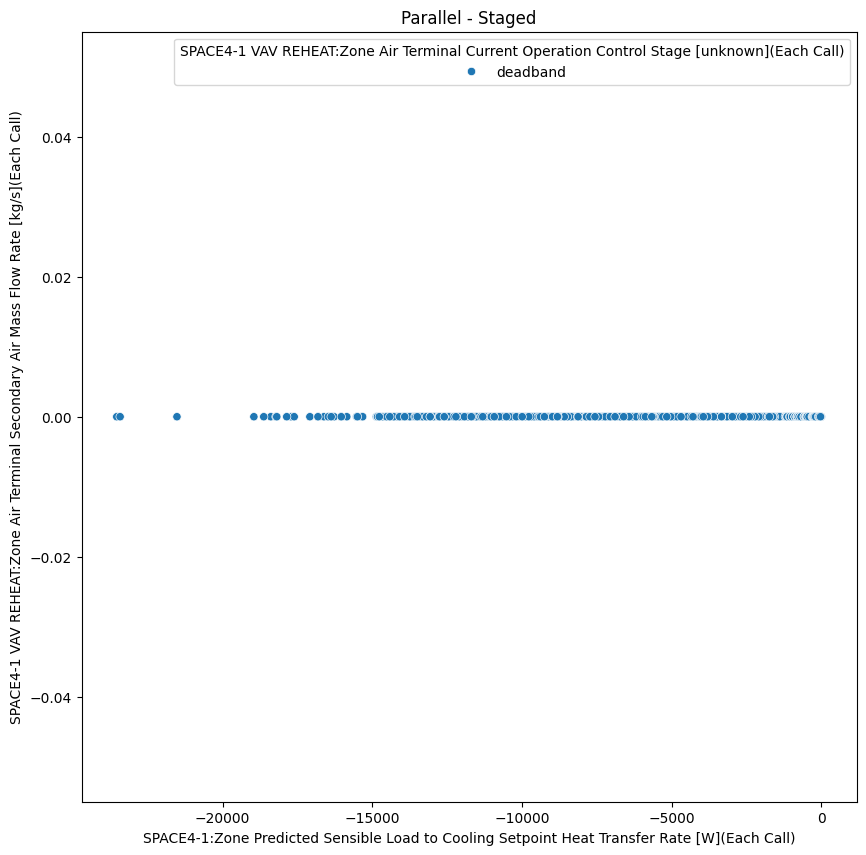

In [12]:
for i in range(len(predicated_keys)):
    plt.figure(figsize=(10,10))
    plt.title(f"{titles[i]}")
    data_heating = data.loc[data[predicated_keys[i]] < 0, :]
    sns.scatterplot(data=data_heating, x=predicated_keys[i], y=sec_air_flow_keys[i], hue=operation_keys[i], palette='tab10')
    plt.show()
